## Introduction

### About competition
~~~

### Contents
1. [Visual inspection of your data](#visual_inspection)
2. [Defining the metadata](#metadata)
3. [Descriptive statistics](#descriptive_stats)
4. [Handling imbalanced classes](#imbalanced_data)
5. [Data quality checks](#data_quality)
6. [Exploratory data visualization](#eda)
7. [Feature engineering](#feat_engineering)
8. [Feature selection](#feat_selection)
9. [Feature scaling](#feat_scaling)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

## Loading data

In [2]:
train = pd.read_csv('data/porto/train.csv')
test = pd.read_csv('data/porto/test.csv')

## Data at first sight

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


데이터의 features를 보면 고객들의 자세한 정보를 유추하지 못 하도록 **특정 규칙**에 따라 feature를 명명해놓았다.

competition의 data description은 다음과 같이 설명하고 있다.

1. 비슷한 그룹에 속해있는 features는 ind, reg, car, calc 와 같은 이름으로 태그되어있다.
2. feature명에 **_bin**은 binary feature 라는 것을 의미하고 **_cat**는  categorical feature 라는 것을 의미한다.
3. _bin이나 _cat과 같은 태그가 없는 features는 continuous 또는 ordinal feature다.
4. 값이 없는 것은 -1로 표현되었다.
5. **target** 컬럼은 보험 계약자가 보험 청구를 했는지에 대한 여부다.

In [4]:
train.shape

(595212, 59)

훈련 데이터는 59개의 특징과 595212개의 행을 가지고 있다.

테스트 데이터의 특징 수와 같은지, 중복된 데이터가 있는지 확인해보자.

In [5]:
train.drop_duplicates()
train.shape

(595212, 59)

훈련 데이터에는 중복된 행 데이터가 없는 것을 확인했다.

In [6]:
test.shape

(892816, 58)

테스트 데이터의 특징 수가 훈련 데이터의 특징 수보다 하나 적지만 이것은 target 변수 때문이므로 문제가 없다.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

info() 메서드를 통해 데이터 타입이 int인지 float인지 확인할 수 있다.

데이터의 모든 변수가 null값이 없다고 하는데 이것은 값이 없는 것을 -1로 표현했기 때문에 당연한 것이다.

### Metadata
데이터 관리를 용이하게 하기 위해 DataFrame에 변수들에 대한 meta-information을 저장할 것이다.

+ **role**: input, ID, target
+ **level**: nominal, interval, ordinal, binary
+ **keep**: True or False
+ **dtype**: int, float, str

In [8]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == 'float64':
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [9]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


이제 삭제되지 않은 특징 중 categorical 변수를 찾고 싶다면 다음과 같이 하면 된다.

In [10]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

다음은 role과 level 당 변수들의 수를 표시한 것이다.

In [11]:
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics

DataFrame의 describe 메서드로 통계 분석을 할 수 있다. 그러나 categorical features와 id의 평균, 표준편차 등의 값은 별 의미가 없다. 그래서 후에 categorical 변수들은 시각적으로 볼 것이다.

### Interval variables

위에서 만든 Meta 데이터 덕분에 통계를 계산하기를 원하는 변수들을 쉽게 선택할 수 있다.

In [12]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


각 특징들의 null 값의 존재 여부는 각 변수의 최소값을 보면 알 수 있다.

#### reg 변수
+ ps_reg_03 에서만 null 값이 존재한다.
+ 각 변수들의 값의 범위가 다르기 때문에 scaling을 적용해주어야 할 수 있다. 그러나 어떤 분류기를 쓰냐에 따라 적용하지 않을 수 있다.

#### car 변수
+ ps_car_12와 ps_car_14 에서 null 값이 존재한다.
+ reg 변수와 마찬가지로 각 변수들의 값 범위가 다르다.

#### calc 변수
+ null 값이 존재하지 않는다.
+ 모든 변수의 최대 비율이 0.9이기 때문에 어떤 종류의 비율인 것 같다.
+ 모든 세 변수가 비슷한 분포를 가지고 있다.

**Overall**

interval 변수들의 범위가 작은 것으로 보아 데이터를 익명화하기 위해 이미 약간의 변형이 되었을 수도 있다.

### Ordinal variables

In [13]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


+ ps_car_11 만 null 값이 존재한다.
+ 각기 다른 범위들을 다루기 위해 scaling을 적용할 수 있다.

### Binary variables

In [14]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


+ target의 평균을 보면 0.036448로, target이 0인 데이터가 1인 데이터에 비해 압도적으로 많은 **불균형 상태이다**.
+ 평균 값들을 보았을 때 대체적으로 변수들의 값이 0인 비율이 많다.

## Handling imbalanced classes

앞서 target=0인 데이터가 target=1인 데이터에 비해 많았다. 이것은 높은 정확도로 이어질 수는 있지만 실제로는 잘 활용할 수 없을 수 있다.<br>
이 문제를 해결하는 두 가지 전략이 있다:
+ oversampling records with target=1
+ undersampling records with target=0

[8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) 글을 참고하면,

oversampling은 적은 개수의 클래스에 데이터의 복사본을 추가하는 것이고, undersampling은 많은 개수의 클래스에서 데이터들을 삭제하는 것이다.

여기선 데이터 수가 적지 않으므로 undersampling을 사용할 수 있다.

In [15]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1) / (nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


In [16]:
print('Rate after undersampling: {}'.format(nb_1 / undersampled_nb_0))

Rate after undersampling: 0.1111111111111111


원하는 class 간 데이터 수 비율을 설정하고 undersample rate를 구하였다. 여기서 undersample rate는 보존할 데이터 수의 비율을 의미한다.

비율에 따라 임의로 데이터를 삭제하여 undersampling 해주었다.

## Data Quality Checks

### Checking missing values

In [17]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        print('  type: < {} >'.format(meta.loc[f]['level']))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
  type: < nominal >
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
  type: < nominal >
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
  type: < nominal >
Variable ps_reg_03 has 38580 records (17.78%) with missing values
  type: < interval >
Variable ps_car_01_cat has 62 records (0.03%) with missing values
  type: < nominal >
Variable ps_car_02_cat has 2 records (0.00%) with missing values
  type: < nominal >
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
  type: < nominal >
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
  type: < nominal >
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
  type: < nominal >
Variable ps_car_09_cat has 230 records (0.11%) with missing values
  type: < nominal >
Variable ps_car_11 has 1 records (0.00%) with missing values
  type: < ordinal >
Variable ps_car_14 has 15726 records (7.25%)

+ **ps_car_03_cat과 ps_car_05_cat**은 missing values의 비율이 매우 높기 때문에 이 변수들은 제거할 것이다.
+ **ps_reg_03과 ps_car_14**은 continuous이므로 평균으로 대체할 것이다.
+ **ps_car_11**은 ordinal이므로 최빈값(mode)로 대체할 것이다.

In [18]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta

# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean')
mode_imp = Imputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

sklearn의 SimpleImputer는 missing values를 간단하게 다른 값으로 대체할 수 있도록 해준다.

### Checking the cardinality of the categorical variables
카디널리티(cardinality)는 변수의 여러 값의 개수를 나타낸다. 나중에 **더미 변수**를 만들기 위해서 많은 고유 값을 갖는 변수가 있는지 확인해야 된다. 여기서 더미 변수란 categorical 변수를 continuous 변수처럼 변환한 것이다.

참고: https://kkokkilkon.tistory.com/37 (Dummy Variable)

In [19]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


**ps_car_11_cat**만 많은 고유 값을 가지고 있다.

In [20]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [21]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

## Exploratory Data Visualization

### Categorical variables

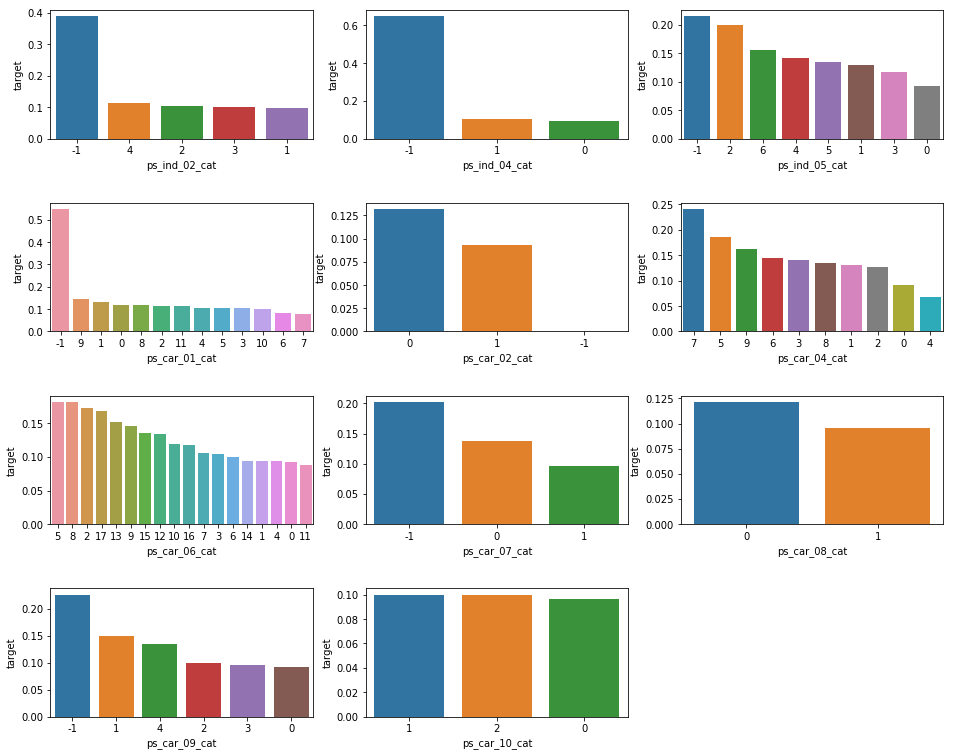

In [44]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

fig, ax = plt.subplots(4, 3, figsize=(16, 13))

for i,f in enumerate(v):
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    row = int(i / 3)
    if row==0: col = i
    else: col = i - (row*3)
    sns.barplot(ax=ax[row, col], x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

fig.delaxes(ax[3, 2])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

대부분의 변수를 보면 **missing value**를 가진 고객이 보험 청구를 할 확률이 높은 것 같다. 그래서 mode로 대체하는 것 대신에 그냥 유지하는 것도 좋은 전략이 될 수 있다.

### Interval variables

Interval 변수들 사이에 상관관계를 확인해보자. heatmap은 변수들 간의 상관관계를 시각화하기에 좋은 방법이다.

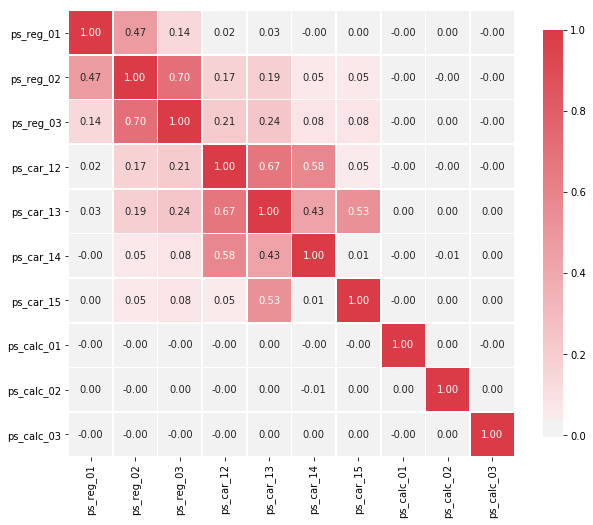

In [51]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show()
    
v = meta[(meta.level=='interval') & (meta.keep)].index
corr_heatmap(v)

다음 변수들 간 강한 상관관계가 있다. (0.5 이상)
+ ps_reg_02와 ps_reg_03 (0.7)
+ ps_car_12와 ps_car_13 (0.67)
+ ps_car_12와 ps_car_14 (0.58)
+ ps_car_13와 ps_car_15 (0.53)

Seaborn has some handy plots to visualize the (linear) relationship between variables. We could use a *pairplot* to visualize the relationship between the variables. But because the heatmap already showed the limited number of correlated variables, we'll look at each of the highly correlated variables separately.<br>
**NOTE**: I take a sample of the train data to speed up the process. 

In [46]:
s = train.sample(frac=0.1)

#### ps_reg_02 and ps_reg_03
As the regression line shows, there is a linear relationship between these variables. Thanks to the *hue* parameter we can see that the regression lines for target=0 and target=1 are the same.

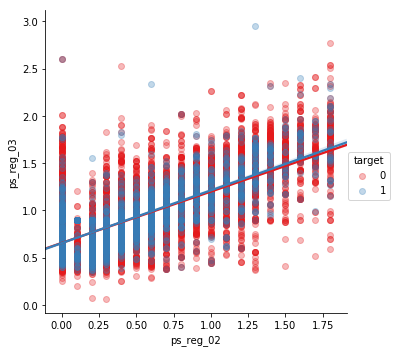

In [47]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 and ps_car_13

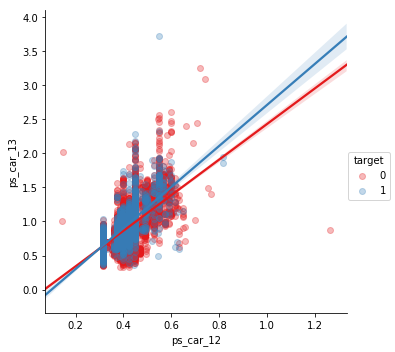

In [48]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 and ps_car_14

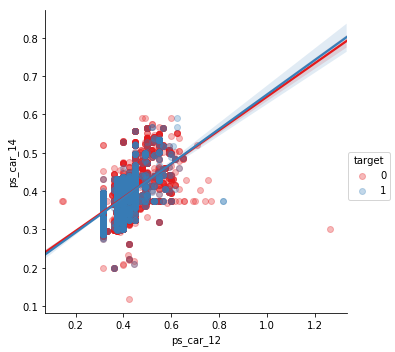

In [49]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_13 and ps_car_15

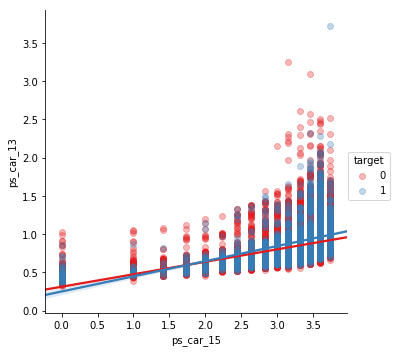

In [52]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

위 그래프들을 봤을 때 어떤 상관된 변수를 유지할 것인가를 어떻게 결정할 수 있을까? 차수를 줄이기 위해 변수에 대한 주성분 분석(PCA)을 수행할 수 있다. 그러나 상관관계 변수의 수가 너무 적기 때문에 모델을 무겁게 만들 필요가 있다.

### Checking the correlations between ordinal variables

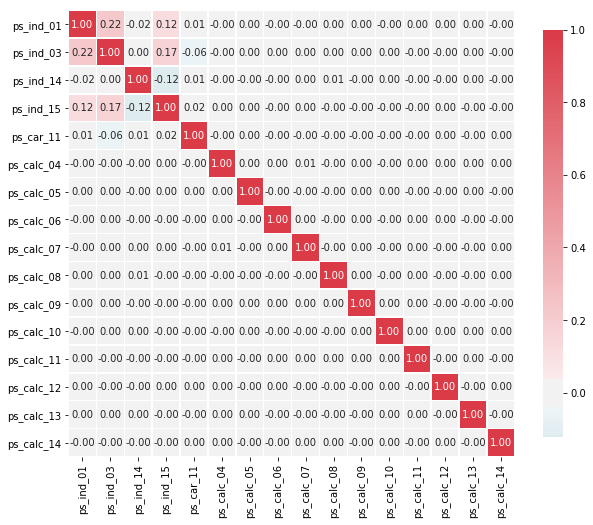

In [53]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

위 heatmap을 봤을 때 높은 상관관계의 변수들이 보이지 않는다. 반면 target 값을 기준으로 그룹화 할 때 분포가 어떻게 되는지 살펴볼 수 있다.

## Feature engineering

### Creating dummy variables
categorical 변수는 순서나 크기가 존재하지 않는다. 따라서 더미 변수를 만들 수 있다. 이 정보는 원래 변수의 범주에 대해 생성 된 다른 더미 변수에서 파생 될 수 있으므로 첫 번째 더미 변수를 삭제한다.

In [54]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


훈련 데이터셋에 52개의 변수가 추가되었다.

### Creating interaction variables

[About interaction variables](https://robotcat.tistory.com/140)

In [55]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
# Remove the original columns
interactions.drop(v, axis=1, inplace=True)
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


In [56]:
interactions.head()

,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.36,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,0.702500,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.000000,0.136,0.199365,0.127483,0.737564,0.331904,0.110635,0.000000,0.292252,0.186880,1.081207,0.486543,0.162181,0.000000,0.1195,0.691375,0.311119,0.103706,0.000000,4.0,1.800000,0.600000,0.000000,0.81,0.27,0.00,0.09,0.00,0.00
1,0.81,0.54,0.655596,0.381838,0.344658,0.340933,0.000000,0.18,0.00,0.54,0.36,0.437064,0.254558,0.229772,0.227288,0.000000,0.12,0.00,0.36,0.530625,0.309051,0.278958,0.275943,0.000000,0.145688,0.000000,0.437064,0.180,0.162473,0.160717,0.000000,0.084853,0.000000,0.254558,0.146653,0.145068,0.000000,0.076591,0.000000,0.229772,0.1435,0.000000,0.075763,0.000000,0.227288,0.0,0.000000,0.000000,0.000000,0.04,0.00,0.12,0.00,0.00,0.36
2,0.81,0.54,0.782340,0.360000,0.732844,0.362131,2.984962,0.27,0.81,0.09,0.36,0.521560,0.240000,0.488563,0.241421,1.989975,0.18,0.54,0.06,0.755625,0.347707,0.707819,0.349765,2.883032,0.260780,0.782340,0.086927,0.160,0.325708,0.160947,1.326650,0.120000,0.360000,0.040000,0.663037,0.327637,2.700631,0.244281,0.732844,0.081427,0.1619,1.334504,0.120710,0.362131,0.040237,11.0,0.994987,2.984962,0.331662,0.09,0.27,0.03,0.81,0.09,0.01
3,0.36,0.90,1.023523,0.240000,0.503032,0.227051,2.163331,0.48,0.24,0.06,2.25,2.558808,0.600000,1.257580,0.567627,5.408327,1.20,0.60,0.15,2.910000,0.682349,1.430181,0.645532,6.150610,1.364698,0.682349,0.170587,0.160,0.335355,0.151367,1.442221,0.320000,0.160000,0.040000,0.702893,0.317260,3.022847,0.670710,0.335355,0.083839,0.1432,1.364405,0.302734,0.151367,0.037842,13.0,2.884441,1.442221,0.360555,0.64,0.32,0.08,0.16,0.04,0.01
4,0.64,0.64,0.869253,0.320000,0.724622,0.307870,2.884441,0.48,0.40,0.72,0.64,0.869253,0.320000,0.724622,0.307870,2.884441,0.48,0.40,0.72,1.180625,0.434626,0.984186,0.418151,3.917668,0.651939,0.543283,0.977909,0.160,0.362311,0.153935,1.442221,0.240000,0.200000,0.360000,0.820432,0.348577,3.265825,0.543466,0.452888,0.815199,0.1481,1.387552,0.230903,0.192419,0.346354,13.0,2.163331,1.802776,3.244996,0.36,0.30,0.54,0.25,0.45,0.81


## Feature selection

### Removing features with low or zero variance

분류기에 의해 특징을 사용할지 안 할지 선택하게 할 수 있다. 그러나 매우 낮은 변수를 제거하는 것은 직접 할 수 있다. sklearn의 **VarianceThreshold** 메서드를 사용하면 임계값을 설정하여 낮은 변수들을 삭제할 수 있다.

In [57]:
# remove features less than 1% variance
selector = VarianceThreshold(threshold=.01)
# Fit to train without id and target variables
selector.fit(train.drop(['id', 'target'], axis=1))

f = np.vectorize(lambda x : not x)

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


We would lose rather many variables if we would select based on variance. But because we do not have so many variables, we'll let the classifier chose. For data sets with many more variables this could reduce the processing time.

Sklearn also comes with other [feature selection methods](http://scikit-learn.org/stable/modules/feature_selection.html). One of these methods is *SelectFromModel* in which you let another classifier select the best features and continue with these. Below I'll show you how to do that with a Random Forest.

### Selecting features with a Random Forest and SelectFromModel
Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromModel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables. 

> The code in the cell below is borrowed from the [GitHub repo of Sebastian Raschka](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb). This repo contains code samples of his book *Python Machine Learning*, which is an absolute must to read.

In [58]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021224
 2) ps_car_13                      0.017289
 3) ps_car_12 ps_car_13            0.017273
 4) ps_car_13 ps_car_14            0.017205
 5) ps_car_13^2                    0.017197
 6) ps_reg_03 ps_car_13            0.017119
 7) ps_reg_01 ps_car_13            0.016836
 8) ps_car_13 ps_car_15            0.016786
 9) ps_reg_03 ps_car_14            0.016271
10) ps_reg_03 ps_car_12            0.015585
11) ps_reg_03 ps_car_15            0.015181
12) ps_car_14 ps_car_15            0.014971
13) ps_car_13 ps_calc_01           0.014768
14) ps_reg_01 ps_reg_03            0.014751
15) ps_car_13 ps_calc_03           0.014663
16) ps_car_13 ps_calc_02           0.014629
17) ps_reg_02 ps_car_13            0.014604
18) ps_reg_01 ps_car_14            0.014433
19) ps_reg_03^2                    0.014242
20) ps_reg_03                      0.014172
21) ps_reg_03 ps_calc_03           0.013764
22) ps_reg_03 ps_calc_02           0.013741
23) ps_reg_03 ps_calc_01        

With SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances. With the *get_support* method we can then limit the number of variables in the train data.

In [59]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [60]:
train = train[selected_vars + ['target']]

## Feature scaling
As mentioned before, we can apply standard scaling to the training data. Some classifiers perform better when this is done.

In [61]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])